# 1. Implementing your own Shazam

In [22]:
import pandas as pd
import numpy as np      
import matplotlib.pyplot as plt 
import scipy.io.wavfile 
import subprocess
import librosa
import librosa.display
import IPython.display as ipd
import pickle

from pathlib import Path, PurePath   
from tqdm.notebook import tqdm

In [41]:
from AudioSignals import *
from minhashing import *

### Settings

In [3]:
N_TRACKS = 1413
HOP_SIZE = 512
OFFSET = 1.0
DURATION = 30 # TODO: to be tuned!
THRESHOLD = 0 # TODO: to be tuned!

### Preprocessing

Converting every mp3 track to wav

In [4]:
#track_conversion()

  0%|          | 0/1413 [00:00<?, ?it/s]

Creating a txt file containing the paths of all the songs

In [78]:
#create_wav_list()

PER TIRARE FUORI LA LISTA DEI PATH

In [ ]:
track_paths = retrieve_track_paths()

PER TIRARE FUORI LA LISTA DEI NOMI

In [ ]:
# now every name is associated with a number from 0 to 1412
track_vocabulary = retrieve_track_vocabulary()

In [ ]:
# to find the title of track i
track_vocabulary[i]

### Audio signals

This function plots the spectrogram of the i^th audio file

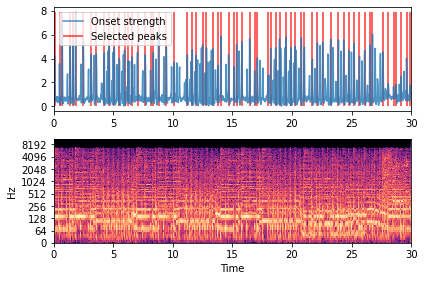

In [37]:
i = 0
indexed_plot_spectrogram_and_peaks(i)

This function generates the triplets dictionary and the triplets list

In [34]:
generate_peak_triplets()

  0%|          | 0/1413 [00:00<?, ?it/s]

To retrieve them:

In [35]:
shingles_list = load_shingles_list()
shingles_dictionary = load_shingles_dictionary()

In [40]:
shingles_list[i] # contains the list of the shingles_id that are present in the i^th track
shingles_dictionary[(7, 18, 8)] # is the integer value associated with the triplet (7, 18, 8)

0

In [39]:
shingles_dictionary

{(7, 18, 8): 0,
 (8, 10, 13): 1,
 (13, 28, 13): 2,
 (13, 10, 13): 3,
 (13, 10, 5): 4,
 (5, 28, 14): 5,
 (14, 28, 8): 6,
 (8, 19, 8): 7,
 (8, 29, 8): 8,
 (8, 18, 8): 9,
 (8, 18, 7): 10,
 (7, 19, 7): 11,
 (7, 13, 11): 12,
 (11, 15, 16): 13,
 (16, 19, 14): 14,
 (14, 28, 13): 15,
 (13, 19, 8): 16,
 (8, 28, 14): 17,
 (8, 48, 8): 18,
 (8, 14, 11): 19,
 (11, 23, 8): 20,
 (8, 19, 15): 21,
 (15, 10, 4): 22,
 (4, 28, 14): 23,
 (14, 19, 8): 24,
 (14, 18, 8): 25,
 (13, 38, 11): 26,
 (11, 10, 8): 27,
 (8, 14, 21): 28,
 (21, 23, 8): 29,
 (8, 11, 7): 30,
 (7, 29, 11): 31,
 (11, 18, 14): 32,
 (14, 19, 13): 33,
 (13, 29, 14): 34,
 (8, 19, 14): 35,
 (14, 19, 16): 36,
 (16, 19, 13): 37,
 (8, 10, 8): 38,
 (8, 38, 8): 39,
 (8, 19, 33): 40,
 (33, 10, 32): 41,
 (32, 18, 7): 42,
 (7, 19, 20): 43,
 (20, 12, 24): 44,
 (82, 36, 65): 45,
 (65, 28, 35): 46,
 (35, 26, 69): 47,
 (69, 17, 70): 48,
 (70, 19, 39): 49,
 (39, 17, 70): 50,
 (70, 37, 13): 51,
 (13, 27, 79): 52,
 (79, 27, 39): 53,
 (39, 18, 70): 54,
 (70, 1

There are two function to convert the values in those triplets (freq, time_difference, next_freq) in actual seconds and Hz (i think):

In [ ]:
# look inside AudioSignals.py to make these work, they are useless anyway
bins_to_time()
bins_to_freq()

### Minhash

These two function generates the parameters of an hash function and the actual hash function (the details are in minhashing.py)

In [66]:
# n: the prime number of the hash function
n = 2003
# number_addings: the number of desired argument the hash function should take in input
number_addings = 4
parameters = generate_hash_parameters(n, number_addings)

# this returns the hash function associated with the above parameters
hash_fun = retrieve_hash_function(parameters)

In [67]:
# this is the actual hash function
hash_fun(0,78,250,2334)

1869

This is to check that the hash function above works as intended

In [68]:
print(parameters)
value = (0*parameters[1][0] + 78*parameters[1][1] + 250*parameters[1][2] + 2334*parameters[1][3]) % n
print('The hash function is', value)

(2003, array([1290,  322,  587, 1205]))
The hash function is 1869


# Pipeline


1. make a dictionary with keys= S_i and values= Song name         DONE
2. considering the triplets (peak_i, intervall of time (peak_i,peak_i+1),peak_i+1)         DONE   
3. using a dictionary with keys= triplet and values= D_i          DONE
4. compile the matrix with 0 and 1 according to the fact that the i-th triplet appears in j-th song
5. MINHASH: we use 100 hashfunction to start
6. Create a signature matrix
7. ? speeding up minhashing ?
8. minhashing of query
9. using jaccard similarity to compare the query to the elements of the database and retrieve songs according to the similarity


In [52]:
def generate_hash_parameters(n, number_addings):
    '''
    randomly exctract an hash function from the universal hash family
    of number_addings parameters associated with the prime n
    '''
    
    params = np.random.randint(0, n, number_addings)
    
    return (n, params)


def retrieve_hash_function(parameters):
    '''
    return the hash function associated to the input parameters
    
    parameters : [n, a1, a2, a3, ...]
    '''
    
    n = parameters[0]
    a = parameters[1]
    
    def hash(*x):
        value = np.sum(np.array(x) * a) % n
        return(value)
    
    return(hash)

# 3. ALGORITHMIC QUESTION

## 3. Algorithmic questions

You are given a list of integers, *A*, and another integer *s*. Write an algorithm that outputs all the pairs in *A* that equal *x*.

For example, if
```
A = [7, -2, 8, 2, 6, 4, -7, 2, 1, 3, -3] and s = 4
```
the algorithm should output: `(7, -3), (-2, 6), (2, 2), (3, 1)`.

The running time of the algotith is proportional to $ n^2 $ since <br><br> $ =\sum_{i=1}^n (n-i-1) $ <br> <br> $ =\sum_{i=1}^{n} n - \sum_{i=1}^{n} i -\sum_{i=1}^{n} i $ <br><br> = $n^2 - \frac{n(n+1)}{2}-n $ <br><br> $= \frac{n^2}{2}-\frac{3n}{2} $ <br><br> $ \propto n^2 $

In [7]:
def algoritmo(A,s):
    result=[]
    for i in range(len(A)):
        j=i+1
        while j<len(A):
            if A[i]+A[j]==s:
                result.append((A[i],A[j]))
            j+=1
    print(result)

In [8]:
algoritmo([7,-2,8,2,6,4,-7,2,1,3,-3],4)

[(7, -3), (-2, 6), (2, 2), (1, 3)]
